`sunpy` is a community-developed analysis environment for solar data. It comes with many tools aimed at streamlining data access, management, analysis and visualization.

### 1.  Comprehensive base example
`sunpy.map` is a high level module that makes plotting the solar disk easy.

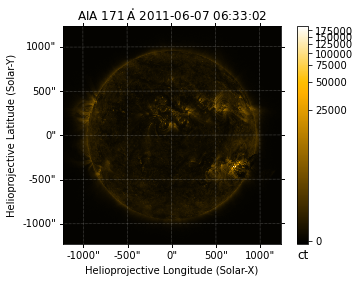

In [1]:
%matplotlib inline

import sunpy.data.sample
import sunpy.map

aia = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)
aia.peek()

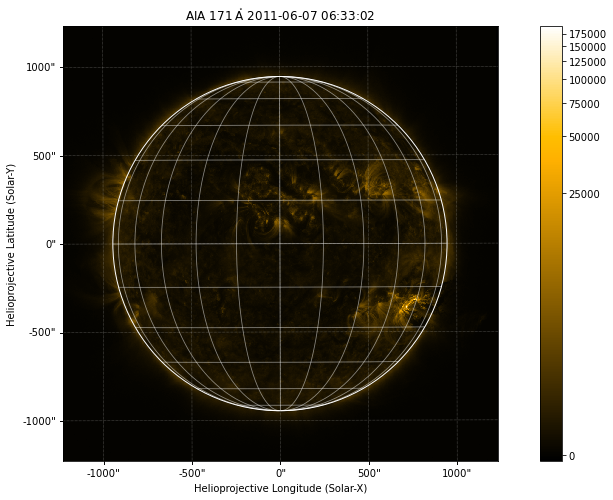

In [2]:
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(15, 8))

ax = aia.plot()
limb = aia.draw_limb()
grid = aia.draw_grid()
clb = plt.colorbar()

In [3]:
sunpy.data.sample.AIA_171_IMAGE

'/home/mwaidele/.local/share/sunpy/AIA20110607_063302_0171_lowres.fits'

### 2. Finding and downloading data with `Fido`
For browsing and downloading data, `sunpy` offers a downloader client: `sunpy.net.Fido`

In [4]:
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

time_start = '2022/01/01 00:00:00'
time_end = '2022/01/01 00:01:00'
time_interval = a.Time(time_start, time_end)

result = Fido.search(time_interval, a.Instrument.hmi, a.Physobs.los_magnetic_field)
result

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size,Info
,,,,Angstrom,,,,,,,Mibyte,
Time,Time,str3,str3,float64[2],str4,str18,str6,str4,str4,str8,float64,str18
2022-06-01 00:00:37.000,2022-06-01 00:00:38.000,SDO,HMI,6173.0 .. 6174.0,JSOC,LOS_magnetic_field,NARROW,4096,4096,FULLDISK,-0.00098,45sec. Magnetogram


In [5]:
time_start = '2022/01/01 00:00:00'
time_end = '2022/01/01 00:01:00'
time_interval = a.Time(time_start, time_end)

result = Fido.search(time_interval, a.jsoc.Series.hmi_m_720s)
result

T_REC,TELESCOP,INSTRUME,WAVELNTH,CAR_ROT
str23,str7,str12,float64,int64
2022.01.01_00:00:00_TAI,SDO/HMI,HMI_COMBINED,6173.0,2252


In [ ]:
my_email = 'my@email.com'  # JSOC email registry: http://jsoc.stanford.edu/ajax/register_email.html
result = Fido.search(time_interval, a.jsoc.Series.hmi_m_720s, a.jsoc.Notify(my_email))
downloaded_files = Fido.fetch(result)

In [6]:
downloaded_files = ['data/hmi.m_720s.20220101_000000_TAI.3.magnetogram.fits', ]

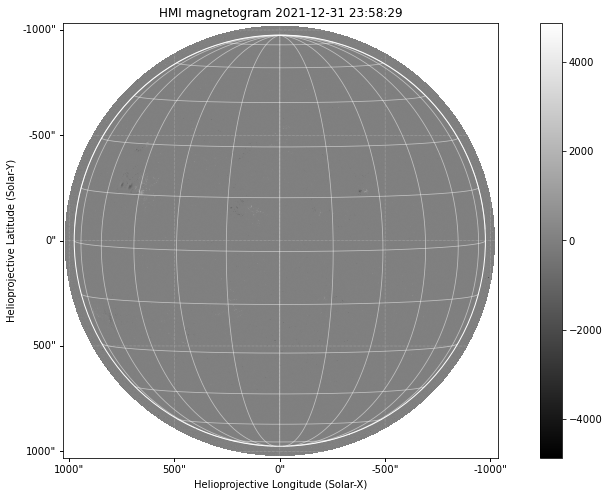

In [7]:
hmi_map = sunpy.map.Map(downloaded_files[0])

fig = plt.figure(2, figsize=(15, 8))
ax = hmi_map.plot()
limb = hmi_map.draw_limb()
grid = hmi_map.draw_grid()
clb = plt.colorbar()

### 3. Converting and plotting coordinates
Dealing with coordinates on the Sun's surface is complex. `sunpy` allows for easy coordinate transformations and this makes plotting easy. For this purpose, `sunpy` relies on `astropy.coordinates`.

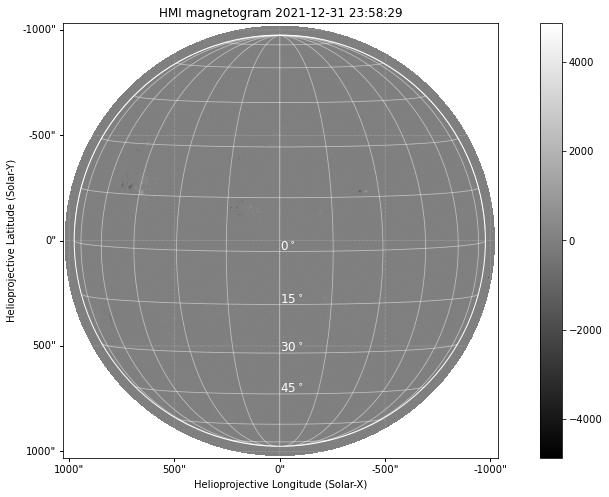

In [8]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

hmi_map = sunpy.map.Map(downloaded_files[0])
# hmi_map = hmi_map.rotate(order=3)

fig = plt.figure(2, figsize=(15, 8))
ax = hmi_map.plot()
limb = hmi_map.draw_limb()
grid = hmi_map.draw_grid()
clb = plt.colorbar()

coordinates_text = (r'$0^\circ$', r'$15^\circ$', 
                    r'$30^\circ$', r'$45^\circ$')
xy_coordinates = ((0, 0), (0, 15), (0, 30), (0, 45))

for i, coord in enumerate(coordinates_text):
    x, y = xy_coordinates[i]
    xy_StonyHurst = SkyCoord(x*u.deg, y*u.deg, 
                             frame=frames.HeliographicStonyhurst)
    xy_HelioProjective = xy_StonyHurst.transform_to(hmi_map.coordinate_frame)
    xy_PixelCoordinates = hmi_map.world_to_pixel(xy_HelioProjective)

    ax.axes.text(xy_PixelCoordinates.x.value + 5, 
                 xy_PixelCoordinates.y.value + 10, 
                 coordinates_text[i], color='white', 
                 fontsize=12)